# CASCADE

## Visualization of Ground Truth Datasets


TODO: describe a bit calcium recording with cell attached spike recording

Different datasets, varying indicators, frame rates, animals...



##1. Load data and import/download required code

In [1]:
#@markdown If this is run in a Colaboratory Notebook, the Github repository with all functions, the ground truth datasets are copied to the environment of this notebook. This will take a couple of seconds.

#@markdown *Note: You can check the code underlying each cell by double-clicking on it.*

import os

# If in Colab and not yet downloaded, download GitHub repository and change working directory
if os.getcwd() == '/content':  
    !git clone https://github.com/HelmchenLabSoftware/Cascade
    os.chdir('Cascade')
    
# If executed as jupyter notebook on own computer, change to parent directory for imports
if os.path.basename( os.getcwd() ) == 'Demo scripts':
    %cd ..
    print('New working directory:', os.getcwd() )
    
    
# Imports:
import matplotlib.pyplot as plt
import numpy as np

from cascade2p import utils
import ipywidgets as widgets

%matplotlib notebook

## Load datasets
datasets = utils.load_all_ground_truth( ground_truth_folder='Ground_truth')
dataset_names = list( datasets.keys() )

/home/adrian/coding/Cascade
New working directory: /home/adrian/coding/Cascade


##2. Explore the ground truth data

<IPython.core.display.Javascript object>


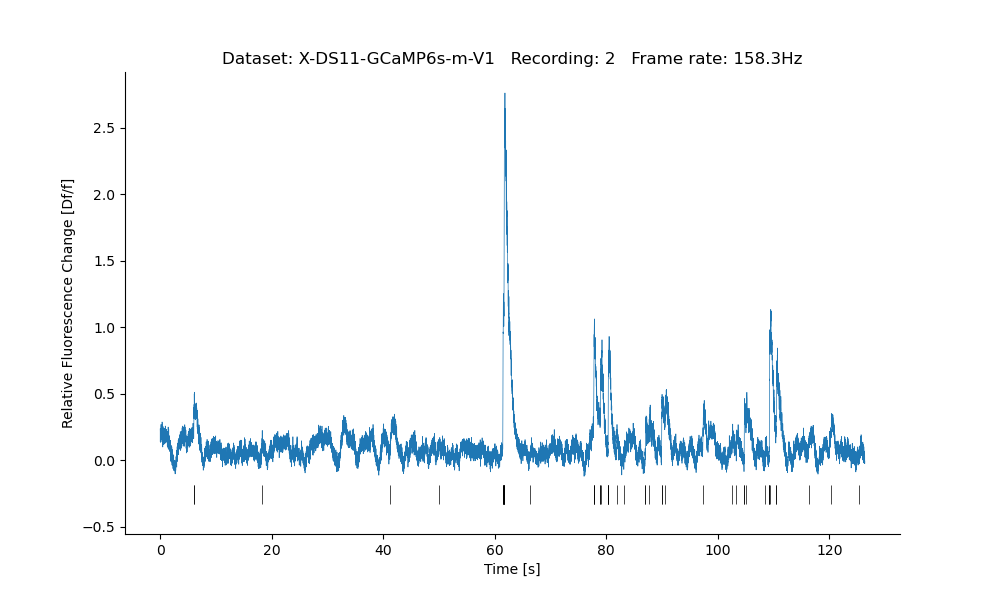

interactive(children=(Dropdown(description='Dataset', options=('X-DS12-GCaMP6s-m-V1', 'DS17-R-CaMP-m-CA3', 'DS…

In [3]:
#@markdown Click the play button on the left, then select the dataset in the dropdown menu and the recording with the slider below.

#@markdown You can zoom into the plot with the 'magnification glass' button at the bottom and draw a rectangle to define the new extend of the axis.


plt.figure(figsize=(10,6))

def plot_neuron(Dataset, Recording):
    """Plot the fluorescence and spikes for a single recording of the dataset
    
    Parameters
    -------
    Dataset: str
        Name of the dataset, which is identical to the folder name in the Ground_truth folder
    Recording: int
        Number of the recording in this dataset, pooled across all files in this dataset
    """
    
    if Recording >= len(datasets[Dataset]):
        print('Value {} is too large. Only {} recordings in this dataset.'.format(Recording, len(datasets[Dataset])))
        return
    
    data = datasets[Dataset][Recording]
    plt.cla()
    plt.plot( data['t'], data['dff'], lw=0.5)
    
    max_dff = np.max( data['dff'])
    min_dff = np.min( data['dff'])
    
    plt.eventplot( data['spikes'], lineoffsets=min_dff - max_dff/20, linelengths=max_dff/20, color='k', lw=0.5)
    
    # TODO: add number of APs if they are very close to each other
    
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Fluorescence Change [Df/f]')
    plt.title('Dataset: {}   Recording: {}   Frame rate: {:.1f}Hz'.format(Dataset, Recording, data['frame_rate']))
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

widgets.interact(plot_neuron, Dataset=dataset_names, Recording=widgets.IntSlider(min=0, max=100, step=1, value=0));